### **Time series analysis on the data International Airline passengers from 1940 to 1960**

In [3]:
# !pip install statsmodels

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
# import data
df = pd.read_csv('data/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
df.shape

(144, 2)

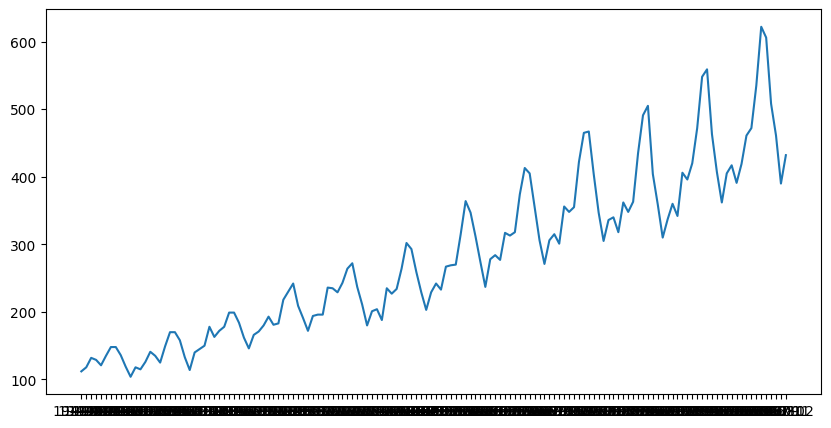

In [9]:
# plot this data to see trends and seasonality
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['#Passengers'], data=df)

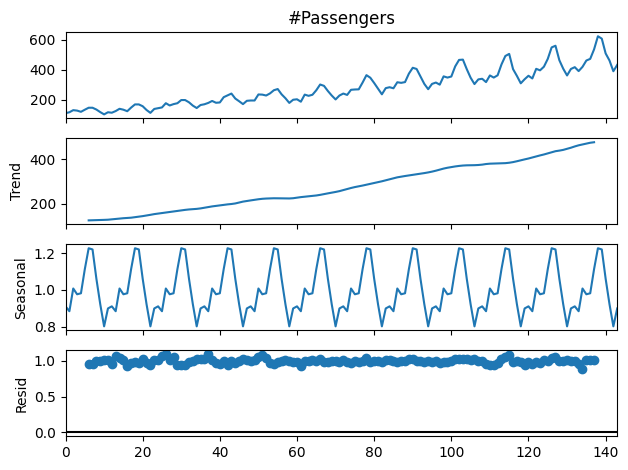

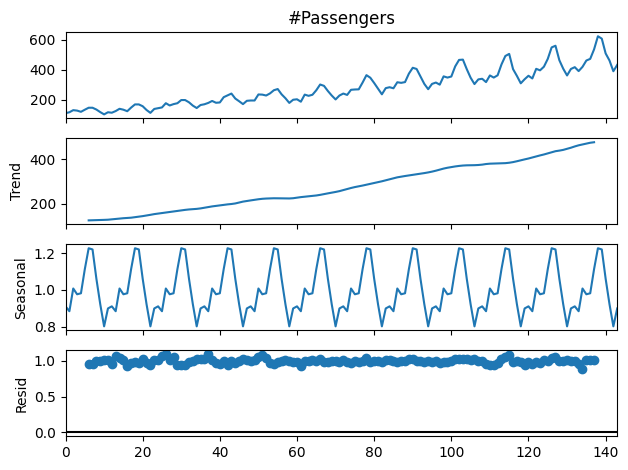

In [10]:
# decompose the data into trends, seasonality and residuals
decomposition = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
decomposition.plot()

<Axes: >

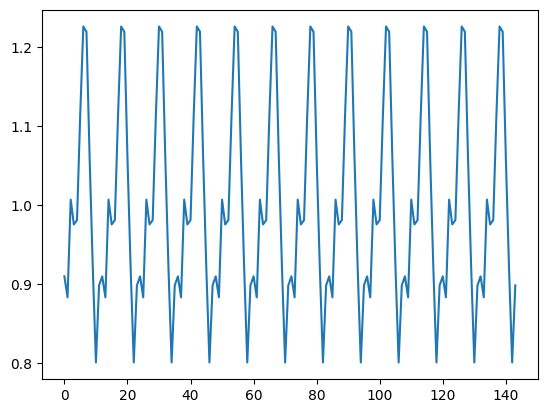

In [13]:
decomposition.seasonal.plot()

In [15]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

c:\Users\Admin\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4360.5391 - root_mean_squared_error: 65.7862
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1232.0844 - root_mean_squared_error: 34.9281
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 969.6955 - root_mean_squared_error: 31.1065
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 831.3049 - root_mean_squared_error: 28.8065
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 755.6532 - root_mean_squared_error: 27.4607
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 734.2205 - root_mean_squared_error: 26.9486
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 707.7927 - root_mean_squared_error: 26.4666  
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 560.5711 - root_mean_squared_error: 23.6478
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 758.6959 - root_mean_squared_error: 27.2553  
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 

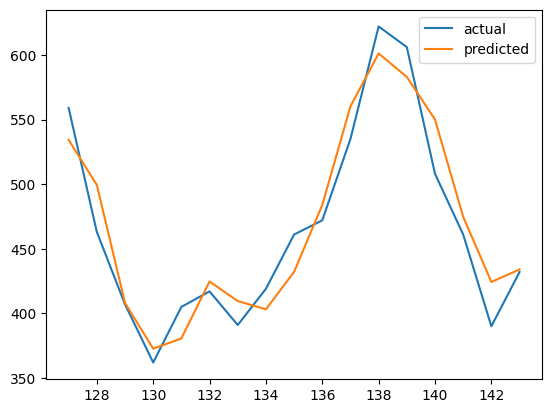

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError

# split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# define the number of lagged time steps to use as input features
n_lags = 12

# create the input and output data for the neural network
X_train = np.array([train["#Passengers"].values[i:i+n_lags] for i in range(len(train)-n_lags)])
y_train = np.array(train["#Passengers"].values[n_lags:])
X_test = np.array([test["#Passengers"].values[i:i+n_lags] for i in range(len(test)-n_lags)])
y_test = np.array(test["#Passengers"].values[n_lags:])

# create the neural network model
model = Sequential()
model.add(Dense(10, input_dim=n_lags, activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[RootMeanSquaredError()])

# train the neural network model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# make predictions on the testing set using the trained model
predictions = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test.index[-len(predictions):], test["#Passengers"].values[-len(predictions):], label="actual")
plt.plot(test.index[-len(predictions):], predictions, label="predicted")
plt.legend()
plt.show()